In [1]:
from selenium import webdriver
import time
import random
import pandas as pd
import numpy as np

In [2]:
url = 'https://the-cuny-hackathon-2021.devpost.com/participants'
path = r'C:\Users\Hong\Desktop\chromedriver'

In [3]:
# Go on devpost and login

driver = webdriver.Chrome(executable_path = path)
driver.get(url)

driver.find_element_by_id('main-link').click()
driver.find_element_by_link_text('Log in with GitHub').click()

with open('github_pw.txt', 'r') as f:
    pw = f.read()
    
driver.find_element_by_id('login_field').send_keys('hon3g')
driver.find_element_by_id('password').send_keys(pw)
driver.find_element_by_xpath('//*[@id="login"]/div[3]/form/input[14]').click()

In [4]:
# Make a scroller function

def anti_lazy_loader(sec):
    start_time = time.time()
    seconds = sec

    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        current_time = time.time()
        elapsed_time = current_time - start_time
        if elapsed_time > seconds:
            print("Finished scrolling in: " + str(int(elapsed_time))  + " seconds")
            break
            
            
anti_lazy_loader(60)

Finished scrolling in: 60 seconds


In [5]:
# Get all participants' profile links

links = []
for e in driver.find_elements_by_xpath('//*[@id="participants"]//div[1]/div[2]/div/h5/a'):
    links.append(e.get_attribute('href'))

In [6]:
# Get the len and random sample 10 links

print(f'len: {len(links)}')
random.sample(links, 10)

len: 484


['https://devpost.com/muskangargnsit',
 'https://devpost.com/KarmaGyatso',
 'https://devpost.com/ilkyulee-business',
 'https://devpost.com/jaheimarchibald',
 'https://devpost.com/jashpuja',
 'https://devpost.com/paez-edward5',
 'https://devpost.com/gurung-karmat',
 'https://devpost.com/MajorLeagueHacking',
 'https://devpost.com/andrew-lu1',
 'https://devpost.com/efazahmededu']

In [7]:
# Time the fetching process
start = time.perf_counter()


# Create a hacker dictionary
hacker = {
    'name'       : [],
    'location'   : [],
    'skills'     : [],
    'interests'  : [],
    'projects'   : [],
    'hackathon'  : [],
    'achievement': [],
    'followers'  : [],
    'following'  : [],
    'likes'      : [],
}


# Loop through each participant
for l in links:
    driver.get(l)
    
    
    # Get name
    try:
        e = driver.find_elements_by_xpath('//*[@id="portfolio-user-name"]')[0]
        name = e.text[: e.text.index('(') - 1].title()

        hacker['name'].append(name)
    ## Someone keeps changing names
    except IndexError:
        continue
    
    
    # Get location
    try:
        e = driver.find_elements_by_xpath('//*[@id="portfolio-user-links"]/li[1]')[0]
        if e.text in {'GitHub', 'LinkedIn', 'Website'}:
            location = '?'
        location = e.text
    except IndexError:
        location = '?'
        
    hacker['location'].append(location)
    
    
    # Get skills
    skills = []
    for i in range(999):
        try:
            e = driver.find_elements_by_xpath('//*[@id="portfolio-user-info"]/div/div/div[1]/ul/li')[i]
            skills.append(e.text)
        except IndexError:
            break
    hacker['skills'].append(skills)
    
    
    # Get interests
    interests = []
    for i in range(999):
        try:
            e = driver.find_elements_by_xpath('//*[@id="portfolio-user-info"]/div/div/div[2]/ul/li')[i]
            interests.append(e.text)
        except IndexError:
            break
    hacker['interests'].append(interests)
            
    
    # Get projects, hackathon, achievement, followers, following, and likes
    loc = 1
    for i in ('projects', 'hackathon', 'achievement', 'followers', 'following', 'likes'):
        e = driver.find_elements_by_xpath(f'//*[@id="portfolio-navigation"]/ul/li[{loc}]/a/div/span')[0]
        hacker[i].append(e.text)
        loc += 1



end = time.perf_counter()
mins = round((end - start) / 60,  1)
print(f'Finished fetching in: {mins} minutes!')

Finished fetching in: 85.27 minutes!


In [8]:
# Convert hacker ditionary into a pandas dataframe and
# Replace all missing values ?s with numpy nan

df = pd.DataFrame(hacker)
df.replace('?', np.nan, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         483 non-null    object
 1   location     462 non-null    object
 2   skills       483 non-null    object
 3   interests    483 non-null    object
 4   projects     483 non-null    object
 5   hackathon    483 non-null    object
 6   achievement  483 non-null    object
 7   followers    483 non-null    object
 8   following    483 non-null    object
 9   likes        483 non-null    object
dtypes: object(10)
memory usage: 37.9+ KB


In [11]:
df.sample(10)

,name,location,skills,interests,projects,hackathon,achievement,followers,following,likes
103,Mohamed Kone,"East Orange, New Jersey, United States","[java, c++, sql, python, r]","[AR/VR, Blockchain, Communication, Cybersecuri...",0,1,1,0,0,0
185,Anik Barua,"New York, New York, United States","[java, html, css, c++, javascript]","[Blockchain, Gaming, Healthcare, Machine Learn...",0,1,1,0,0,0
224,Jia Yu Lin,Website,[],[],5,4,9,8,4,2
156,Rohith1221 Rohith,"Andhra Pradesh, India","[javascript, html, css, c++, python]","[AR/VR, Blockchain, IoT, Machine Learning/ AI]",0,1,1,0,0,0
161,Randeep Ahlawat,"Dallas, Texas, United States","[python, pytorch, tensorflow, c++, javascript]","[Machine Learning/ AI, Music, Social Good]",0,3,1,0,0,0
105,Ismael Belem,"New York, New York, United States","[java, python, r]","[Cybersecurity, Lifehacks, Machine Learning/ AI]",0,1,1,0,0,0
220,Jamesdeciutiis Deciutiis,"New York, New York, United States","[c++, javascript, python]","[Blockchain, Fintech, Gaming, IoT, Lifehacks, ...",0,1,1,0,0,0
253,Chanchal Bansal,"Porsa, MP, IN","[html5, css, python, bootstrap, c, c++, google...","[Communication, Machine Learning/ AI]",0,6,1,0,0,0
248,Shivanshu Sahoo,NaN,[],[],4,16,5,6,3,6
359,Vinay Sati,"Ghaziabad, UP, IN","[html, javascript, java, sql]","[Cybersecurity, Voice skills]",0,5,1,0,0,0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'NaN Data')

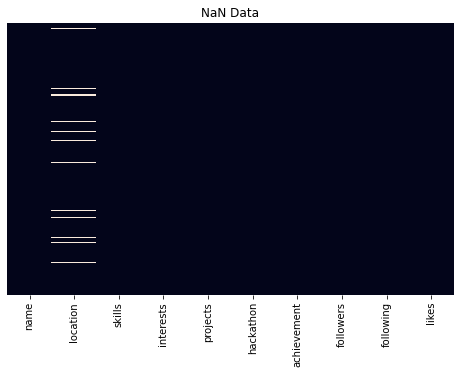

In [22]:
# Visualize the missing data

plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('NaN Data')

Text(0.5, 1.0, 'NaN Data')

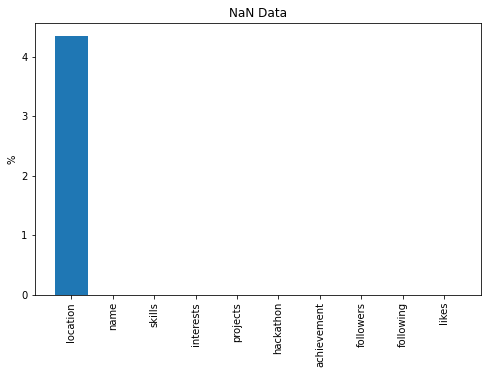

In [26]:
plt.figure(figsize=(8, 5))
missing = pd.DataFrame({'column':df.columns, 'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent', ascending=False, inplace=True)
plt.bar(missing['column'], missing['na_percent'])
plt.ylabel('%')
plt.xticks(rotation=90)
plt.title('NaN Data')